**Keywords**: *Prognostic Health Management*

In [46]:
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)

Modern systems are currently monitored by multiple sensors that generates large volumes of data. For instance, for a Boeing 787, approximately 1000 parameters are continously monitored for the engine, leading to a total of 20 TB of data per flight hour.

*Badea VE, Zamfiroiu A, Boncea R. "Bigdata in the aerospace industry". Inform Econ 2018; 22(1):17–24.*

Important components in a turbofan engine as far as C-MAPSS data concerns are **Fan**, **Low Pressure Compressor (LPC)**, **High Pressure Compressor (HPC)**, **Low Pressure Turbine (LPT)**, and **High Pressure Turbine**. During the operation of engines, degradation occurs in each of the components. If degredation level in any component exceeds a threshold, the engine is said to have failed.

- Jet engines are inspected before every take off, and this is a form of periodic maintenance that is not cost effective. Since the crucial nature of the operation, the strategy is justified to forsee possiblity of an engine to fail mid-air.
- Also a system that is capable of issuing early warnings may help responsibles to prepare for the problem, if not prevent altogether. 

This dataset was generated with C-MAPSS ('Commercial Modular Aero-Propulsion System Simulation') simulator. C-MAPSS is a tool for the simulation of realistic large commercial turbofan engine data. The time series data were collected from 21 sensors for each engine in the dataset.

- Dataset contains data from same type of engine.
- Engines were healthy in the early stages of operations and tended to degrade over time until a failure occurred.
- Data was contaminated with sensor noise

**Goal**: Predict the number of remaining operational cycles before a system failure occurs in the test set. 

In [7]:
index_names = [
    'engine', 
    'cycle'
]

setting_names = [
    'setting_1', 
    'setting_2', 
    'setting_3'
]

sensor_names = [ 
    "(Fan inlet temperature) (◦R)",
    "(LPC outlet temperature) (◦R)",
    "(HPC outlet temperature) (◦R)",
    "(LPT outlet temperature) (◦R)",
    "(Fan inlet Pressure) (psia)",
    "(bypass-duct pressure) (psia)",
    "(HPC outlet pressure) (psia)",
    "(Physical fan speed) (rpm)",
    "(Physical core speed) (rpm)",
    "(Engine pressure ratio(P50/P2)",
    "(HPC outlet Static pressure) (psia)",
    "(Ratio of fuel flow to Ps30) (pps/psia)",
    "(Corrected fan speed) (rpm)",
    "(Corrected core speed) (rpm)",
    "(Bypass Ratio) ",
    "(Burner fuel-air ratio)",
    "(Bleed Enthalpy)",
    "(Required fan speed)",
    "(Required fan conversion speed)",
    "(High-pressure turbines Cool air flow)",
    "(Low-pressure turbines Cool air flow)"
]

col_names = index_names + setting_names + sensor_names

In [8]:
df_train = pd.read_csv('CMAPSSData/train_FD001.txt', sep='\s+', header=None, names=col_names)

df_train.head()

,engine,cycle,setting_1,setting_2,setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(Engine pressure ratio(P50/P2),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [9]:
df_train.shape

(20631, 26)

**Column 1** corresponds to engine number.

In [12]:
print(f"There are a total of {len(np.unique(df_train['engine']))} engines.")

There are a total of 100 engines.


In [34]:
# Check if there is any missing values in the training set

print(f"There are {df_train.isna().sum().sum()} missing values")

There are 0 missing values


#### After how many cycles does each engine fail? 

In [29]:
print(df_train.groupby('engine').size().to_list())

[192, 287, 179, 189, 269, 188, 259, 150, 201, 222, 240, 170, 163, 180, 207, 209, 276, 195, 158, 234, 195, 202, 168, 147, 230, 199, 156, 165, 163, 194, 234, 191, 200, 195, 181, 158, 170, 194, 128, 188, 216, 196, 207, 192, 158, 256, 214, 231, 215, 198, 213, 213, 195, 257, 193, 275, 137, 147, 231, 172, 185, 180, 174, 283, 153, 202, 313, 199, 362, 137, 208, 213, 213, 166, 229, 210, 154, 231, 199, 185, 240, 214, 293, 267, 188, 278, 178, 213, 217, 154, 135, 341, 155, 258, 283, 336, 202, 156, 185, 200]


We can see that engine 1 failed after 192 cycles, and engine 2 failed after 287 cycles.

> At the first cycle of *Engine 1*, its **RUL** is 191. After cycle 2, its **RUL** is 190 and so on. As it fails after 192 cycles, at 192nd cycle, its **RUL** is 0. This type of degredation model is called linear degredation model. From the start of the cycle it decreases gradually to 0 at the last cycle.

#### Distribution of maximum time cycles

In [39]:
max_cycles = df_train[index_names].groupby('engine').max()

In [45]:
max_cycles.iloc[0]

cycle    192
Name: 1, dtype: int64

In [44]:
max_cycles.head()

,cycle
engine,
1,192
2,287
3,179
4,189
5,269


Text(0.5, 6.79999999999999, 'max cycle')

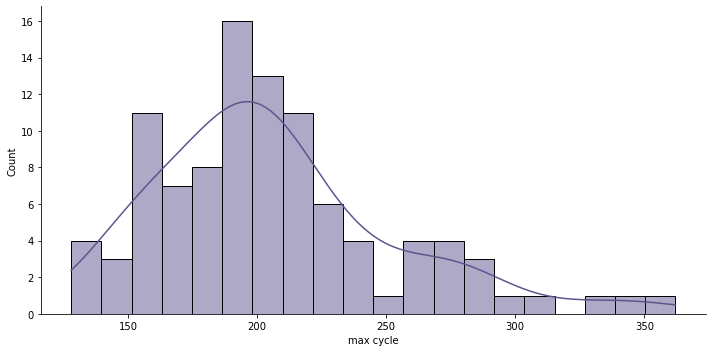

In [60]:
sns.displot(max_cycles['cycle'], kde=True, bins=20, height=5, aspect=2, color='#5e548e')
plt.xlabel('max cycle')

From the training data, we can infer that maximum operational cycles that an engine can achieve is between 190 and 210 before a HPC failure occurs.